# **Assessment 1**
## MTH377 - Convex Optimization

#### **Problem 2**
Write a code to compute the unconstrained minimum of the following optimization problem by implementing a **combination descent algorithm** with initial point (1, 1).


> $\min\limits_{x, y} f(x, y) = (x^2 - 3y^2)^2 + \sin^2(x^2 + y^2)$


[[ -6.74275396 -29.22914897]
 [-29.22914897  89.25724604]]
-14.94189229015447
BEFORE LINE SEARCH_______________________________
curr_X : [1 1] 		 curr_eta : 24.41611435989609
DD : -596.146640435524 		 dirn : [  9.51360499 -22.48639501]
delF : -1624242.6749545024 		 t : 1
AFTER LINE SEARCH________________________________
curr_X : [1 1] 		 curr_eta : 24.41611435989609
DD : -9.314791256805062 		 dirn : [  9.51360499 -22.48639501]
delF : 3.851960476811973 		 t : 0.015625
[[  0.16376165 -23.50367653]
 [-23.50367653  25.76863938]]
-13.798052716577423
BEFORE LINE SEARCH_______________________________
curr_X : [1.14865008 0.64865008] 		 curr_eta : 1.0089281912743082
DD : -1.017936095148047 		 dirn : [0.50068333 0.87592939]
delF : -18.004435250753822 		 t : 1
AFTER LINE SEARCH________________________________
curr_X : [1.14865008 0.64865008] 		 curr_eta : 1.0089281912743082
DD : -0.25448402378701174 		 dirn : [0.50068333 0.87592939]
delF : 0.0899045893124577 		 t : 0.25
[[  8.93811847 -26.185364

Text(0.5, 0, 'z')

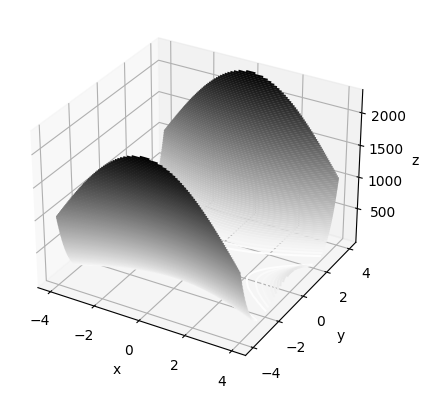

In [31]:
import numdifftools as nd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import math

def f(X):
    # f takes a 1-D array X as input and returns the value of the mathematical function f at this point
    return (X[0]**2 - 3*X[1]**2)**2 + np.sin(X[0]**2 + X[1]**2)**2


# specify initial point x0 as a 1-D ndarray
init_X = np.array([1, 1])

curr_X = init_X
grad_f = nd.Gradient(f)
eta = 0.001
alpha = 0.3
beta = 0.5


while ( math.sqrt(grad_f(curr_X)[0]**2 + grad_f(curr_X)[1]**2) > eta ):
    dirn = -1*grad_f(curr_X)
    H = nd.Hessian(f)(curr_X)
    print(H)
    for i in np.linalg.eigvals(H):
        print(i)
        if i <= 0:
            break
        # compute the hessian
    else:
        # compute the dirn as in Newton Descent
        dirn = np.dot(-1*np.linalg.inv(H), grad_f(curr_X))

    t = 1

    print("BEFORE LINE SEARCH_______________________________")
    print( f"curr_X : {curr_X} \t\t curr_eta : {math.sqrt(grad_f(curr_X)[0]**2 + grad_f(curr_X)[1]**2)}" )
    print( f"DD : {np.dot( np.transpose(grad_f(curr_X)), t*dirn )} \t\t dirn : {dirn}" )
    print( f"delF : {f(curr_X) - f(curr_X + t*dirn)} \t\t t : {t}" )

    while ( f(curr_X) - f(curr_X + t*dirn) < -1*alpha*np.dot( np.transpose(grad_f(curr_X)), t*dirn ) ):
        t = beta * t

    print("AFTER LINE SEARCH________________________________")
    print( f"curr_X : {curr_X} \t\t curr_eta : {math.sqrt(grad_f(curr_X)[0]**2 + grad_f(curr_X)[1]**2)}" )
    print( f"DD : {np.dot( np.transpose(grad_f(curr_X)), t*dirn )} \t\t dirn : {dirn}" )
    print( f"delF : {f(curr_X) - f(curr_X + t*dirn)} \t\t t : {t}" )
    

    curr_X = curr_X + t*dirn


print(f"\n\nMINIMA AT : {curr_X}")
print(f"MINIMA VALUE : {f(curr_X)}\n\n")
print(f"CURRENT ETA : {math.sqrt(grad_f(curr_X)[0]**2 + grad_f(curr_X)[1]**2)}")


    


# a = np.array([[1, 2, 3], [1, 2, 3], [0, 0, 0]])
# print(a)
# b = np.array([[0, 1, 1], [1, 0, 0], [4, 1, 0]])
# print(-b)

# a@b

# res = minimize(f , initX , method='BFGS', jac=J , tol=1e-6)

# res


def fnp(X, Y):
    return (X**2 - 3*Y**2)**2 + np.sin(X**2 + Y**2)**2

fig = plt.figure()
ax = plt.axes(projection='3d')

xline = np.linspace(-4, 4, 100)
yline = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(xline, yline)
Z = fnp(X, Y)

ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#### **Problem 2**
Suppose $S$ is a subset of $\mathbb{R}^n$ that is defined by a collection of inequalities:

> $S = \{ x ∈ \mathbb{R}^n :$ for every $j = 1, ..., m, g_j(x) ≥ 0\}$

Associated with any such set $S$ is the potential function defined as

> $\Psi(x) = -\sum_{j=1}^{m} \log{(g_j(x))}$

The analytic center of the set $S$ is the vector that minimizes the associated potential function i.e. the vector $x$ that solves

> $\min\limits_{x} \Psi(x)$

Frame the problem as an unconstrained optimization problem and write a code that uses the
combination descent algorithm with initial point (0.25, 0.25) to compute the analytic center
of $S$.

### Solution

> $\Psi(x) = -\sum_{j=1}^{m} \log{(g_j(x))} = -\log{ (\prod_{j=1}^{m} g_j(x)) }$

Since minimizing $\log{f(x)}$ is equivalent to minimizing $f(x)$, we evaluate

> $\min\limits_{x} (-\prod_{j=1}^{m} g_j(x))$